In [510]:
%pylab inline
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
import tracpy.tools
import tracpy
import glob
import cartopy.crs as ccrs
import cmocean as cmo
import cartopy
import tracpy.plotting
import octant
from matplotlib import cm, colors
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist', 'grid', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [431]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
loc = "http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

In [432]:
d = nc.Dataset(loc)

In [37]:
start_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 4348 + (i*8760) + leap*24
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time]) )
#     print( datetime.datetime.fromtimestamp(d['ocean_time'][time+248]) )
#     print( datetime.datetime.fromtimestamp(d['ocean_time'][time+2*248]) )
    start_time.append( time )
#     start_time.append( time+248 )
#     start_time.append( time+2*248 )

start_time = np.array(start_time)

1993-07-01 00:00:00
1994-07-01 00:00:00
1995-07-01 00:00:00
1996-07-01 00:00:00
1997-07-01 00:00:00
1998-07-01 00:00:00
1999-07-01 00:00:00
2000-07-01 00:00:00
2001-07-01 00:00:00
2002-07-01 00:00:00
2003-07-01 00:00:00
2004-07-01 00:00:00
2005-07-01 00:00:00
2006-07-01 00:00:00
2007-07-01 00:00:00
2008-07-01 00:00:00
2009-07-01 00:00:00
2010-07-01 00:00:00
2011-07-01 00:00:00
2012-07-01 00:00:00
2013-07-01 00:00:00
2014-07-01 00:00:00
2015-07-01 00:00:00
2016-07-01 00:00:00


In [38]:
end_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 248 + 4348 + (i*8760) + leap*24
    print( datetime.datetime.fromtimestamp(d['ocean_time'][time]) )
#     print( datetime.datetime.fromtimestamp(d['ocean_time'][time+248]) )
#     print( datetime.datetime.fromtimestamp(d['ocean_time'][time+2*248]) )
    end_time.append( time )
#     end_time.append( time+248 )
#     end_time.append( time+2*248 )
    
end_time = np.array(end_time)

1993-07-11 08:00:00
1994-07-11 08:00:00
1995-07-11 08:00:00
1996-07-11 08:00:00
1997-07-11 08:00:00
1998-07-11 08:00:00
1999-07-11 08:00:00
2000-07-11 08:00:00
2001-07-11 08:00:00
2002-07-11 08:00:00
2003-07-11 08:00:00
2004-07-11 08:00:00
2005-07-11 08:00:00
2006-07-11 08:00:00
2007-07-11 08:00:00
2008-07-11 08:00:00
2009-07-11 08:00:00
2010-07-11 08:00:00
2011-07-11 08:00:00
2012-07-11 08:00:00
2013-07-11 08:00:00
2014-07-11 08:00:00
2015-07-11 08:00:00
2016-07-11 08:00:00


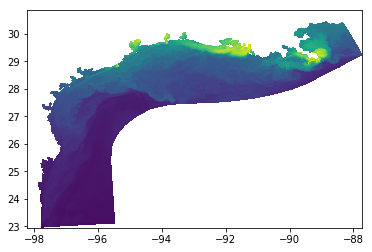

In [570]:
plt.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], d["dye_01"][ 2000, 29, :, :])

# ds = d["dye_01"][ start_time[0] : end_time[0] , 29, 27:35, 301:310]
# ds

# plt.bar( bins[:-1],  hist, width=0.12959)

# Fit Gaussian

In [549]:
def func(x, a, b, c, d ):
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

    return y

# Mississippi

In [186]:
# bins = np.linspace(0,0.11,50)
# hist = np.zeros(len(bins)-1)

# index = 23
# hist += np.histogram( d["dye_02"][ start_time[index] : end_time[index], 29, 27:35, 301:310], bins)[0]

In [187]:
# np.savez( "miss_2016", hist=hist, bins=bins )

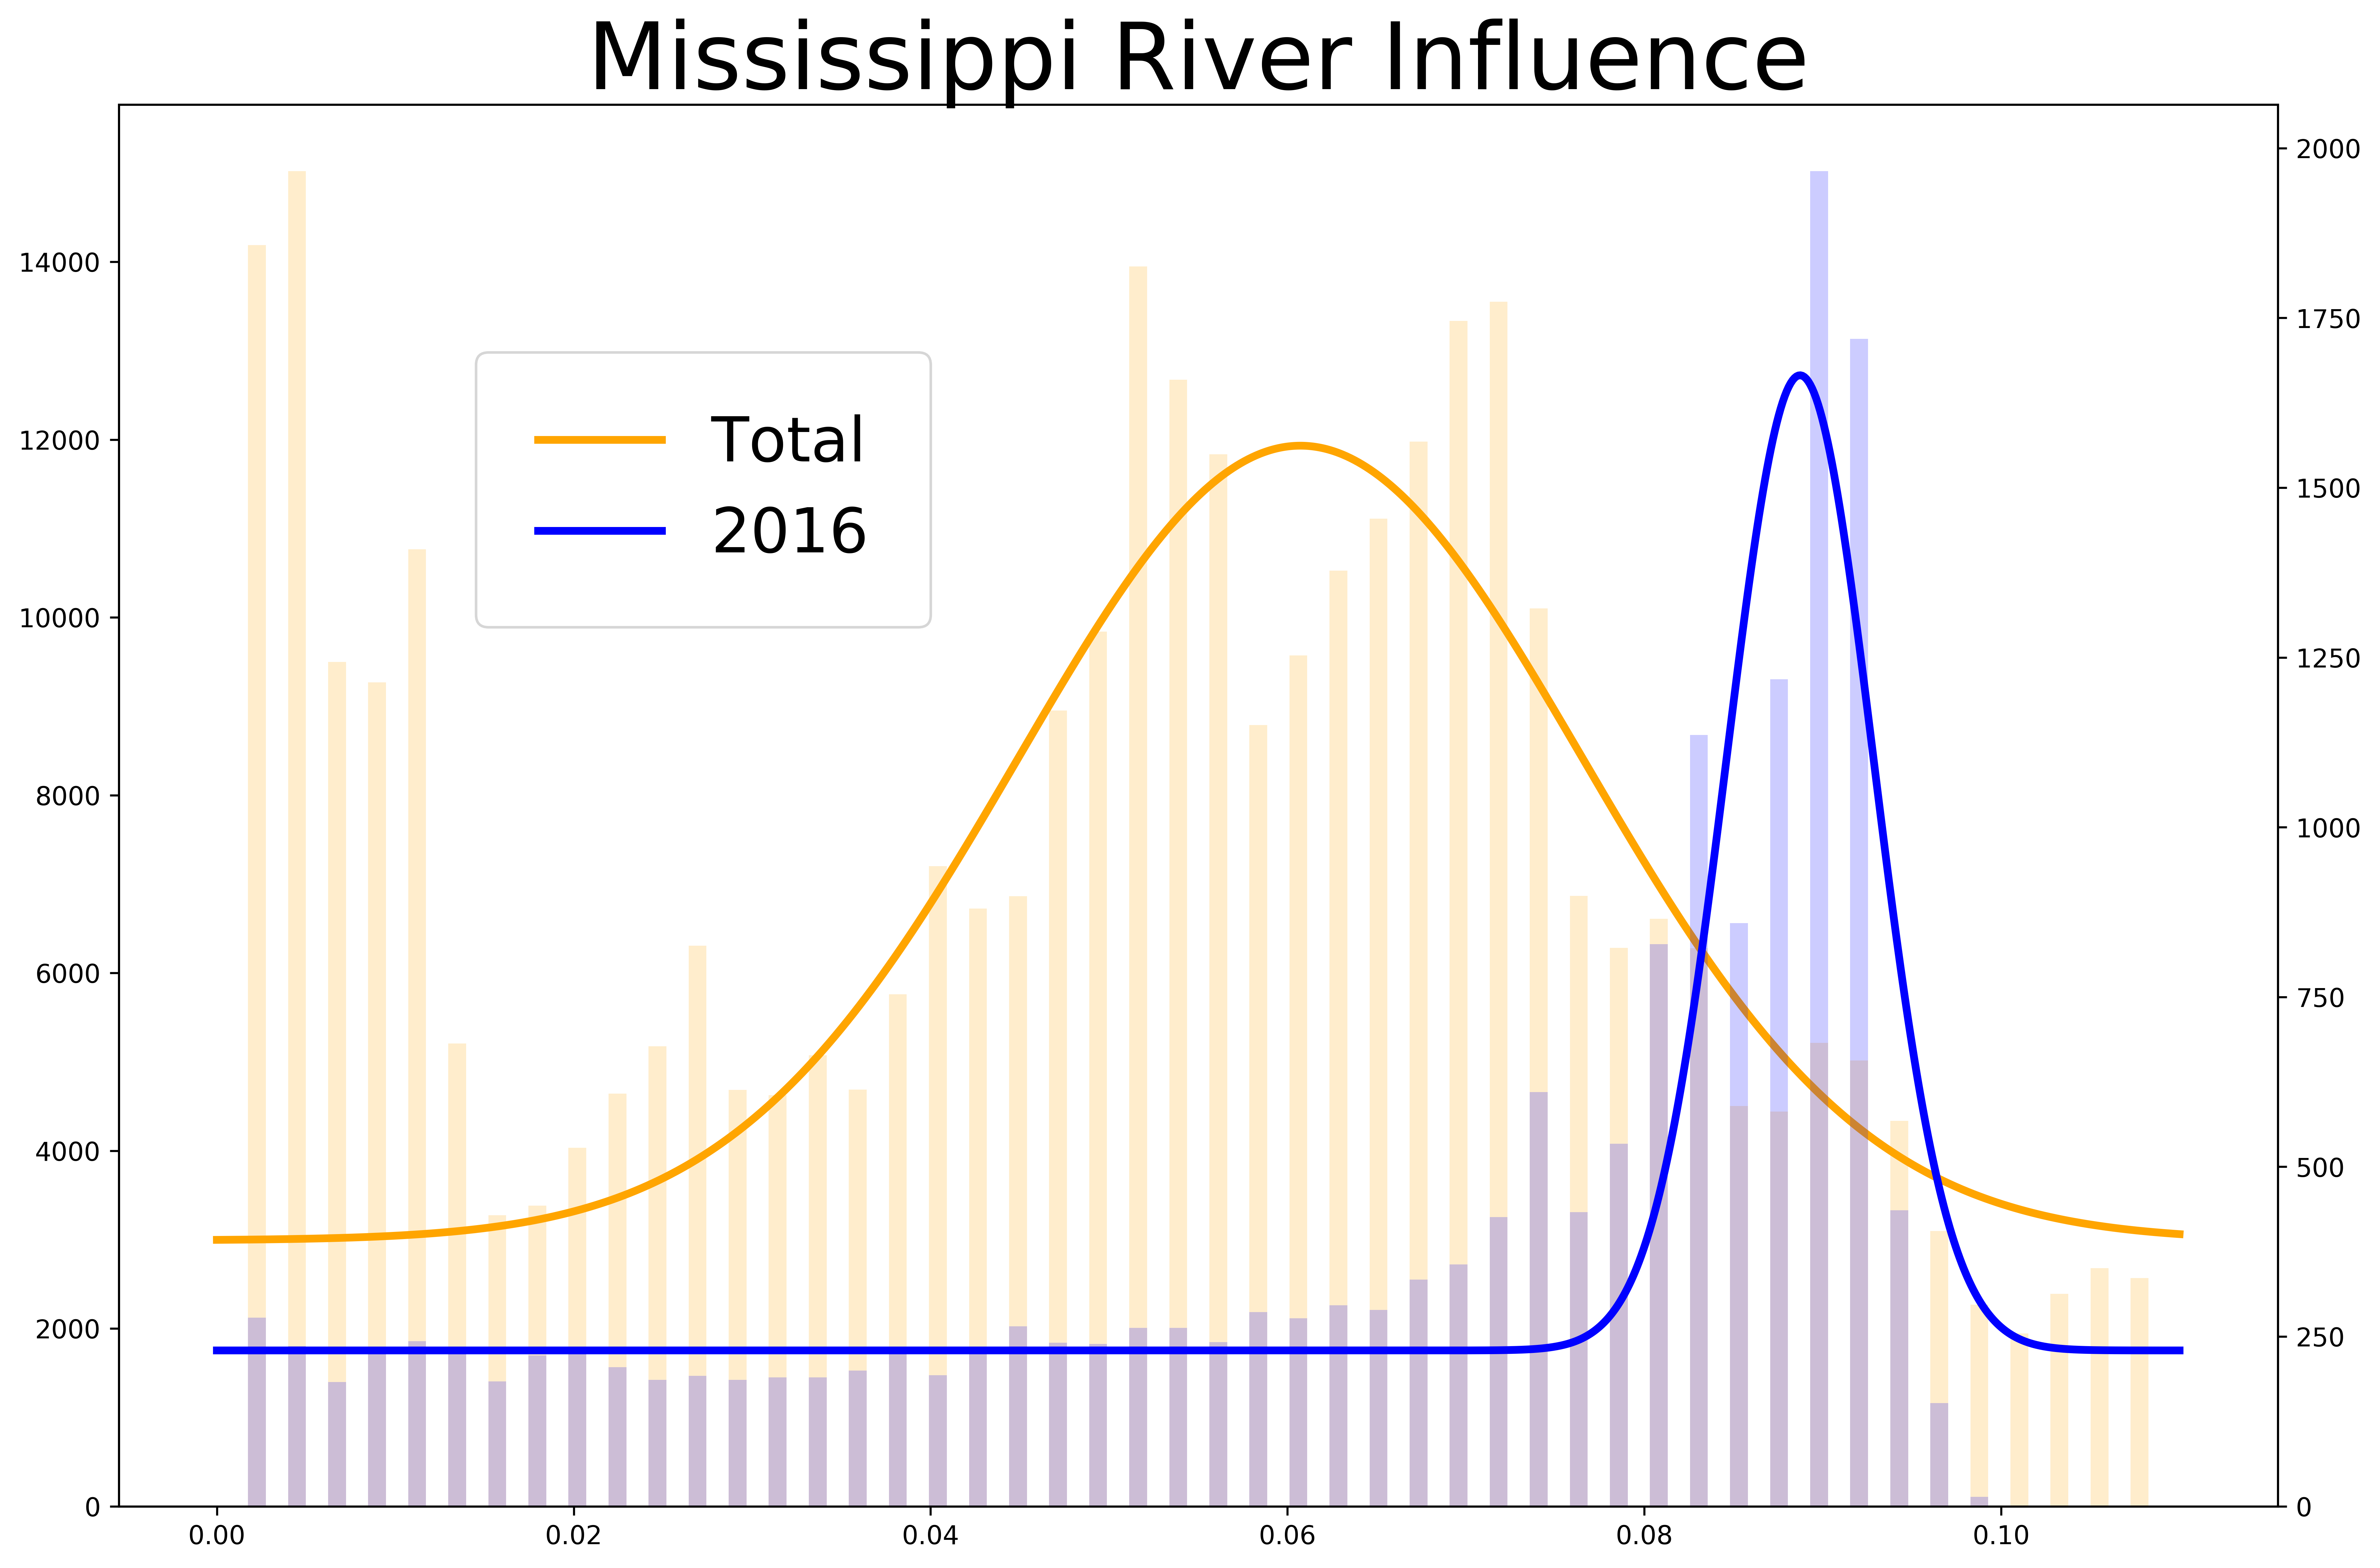

In [634]:
ind = np.arange(1994,2017)
width = 0.8
fig = plt.figure(figsize=(15,10),dpi=600)
fig.tight_layout()   

ax = fig.add_subplot(111)

miss = np.load("miss_all.npz")
barall = ax.bar( miss["bins"][1:-1], miss["hist"][1:], width=0.001, alpha=0.2, color="orange" )

popt, pcov = curve_fit(func, miss["bins"][7:-1], miss["hist"][7:])
xdata = np.linspace(miss["bins"][0], miss["bins"][-1], 1000 )
plotall = ax.plot( xdata, func( xdata, *popt), color="orange", linewidth=3 )

# plt.plot(  miss["bins"][7:-1], miss["hist"][7:] )




miss = np.load("miss_2016.npz")
ax2 = ax.twinx() 
bar16 = ax2.bar( miss["bins"][1:-1], miss["hist"][1:], width=0.001, alpha=0.2, color="blue" )

popt, pcov = curve_fit(func, miss["bins"][0:-1], miss["hist"][0:])
xdata = np.linspace(miss["bins"][0], miss["bins"][-1], 1000 )
plot16 = ax2.plot( xdata, func( xdata, *popt), color="blue", linewidth=3 )


ax.set_title( "Mississippi River Influence", fontsize=36 )
fig.legend( ([plotall[0], plot16[0]]), (["Total", "2016"]), loc=(0.2,0.6), fontsize=24, borderpad=1 )



# Atchafalaya

In [320]:
# bins = np.linspace(0,0.11,50)
# hist = np.zeros(len(bins)-1)

# index = 23
# hist += np.histogram( d["dye_03"][ start_time[index] : end_time[index], 29, 27:35, 301:310], bins)[0]
# plt.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], d["dye_03"][ 100000, 29,:,:])


In [321]:
# np.savez( "atch_2016", hist=hist, bins=bins )

(0, 2000)

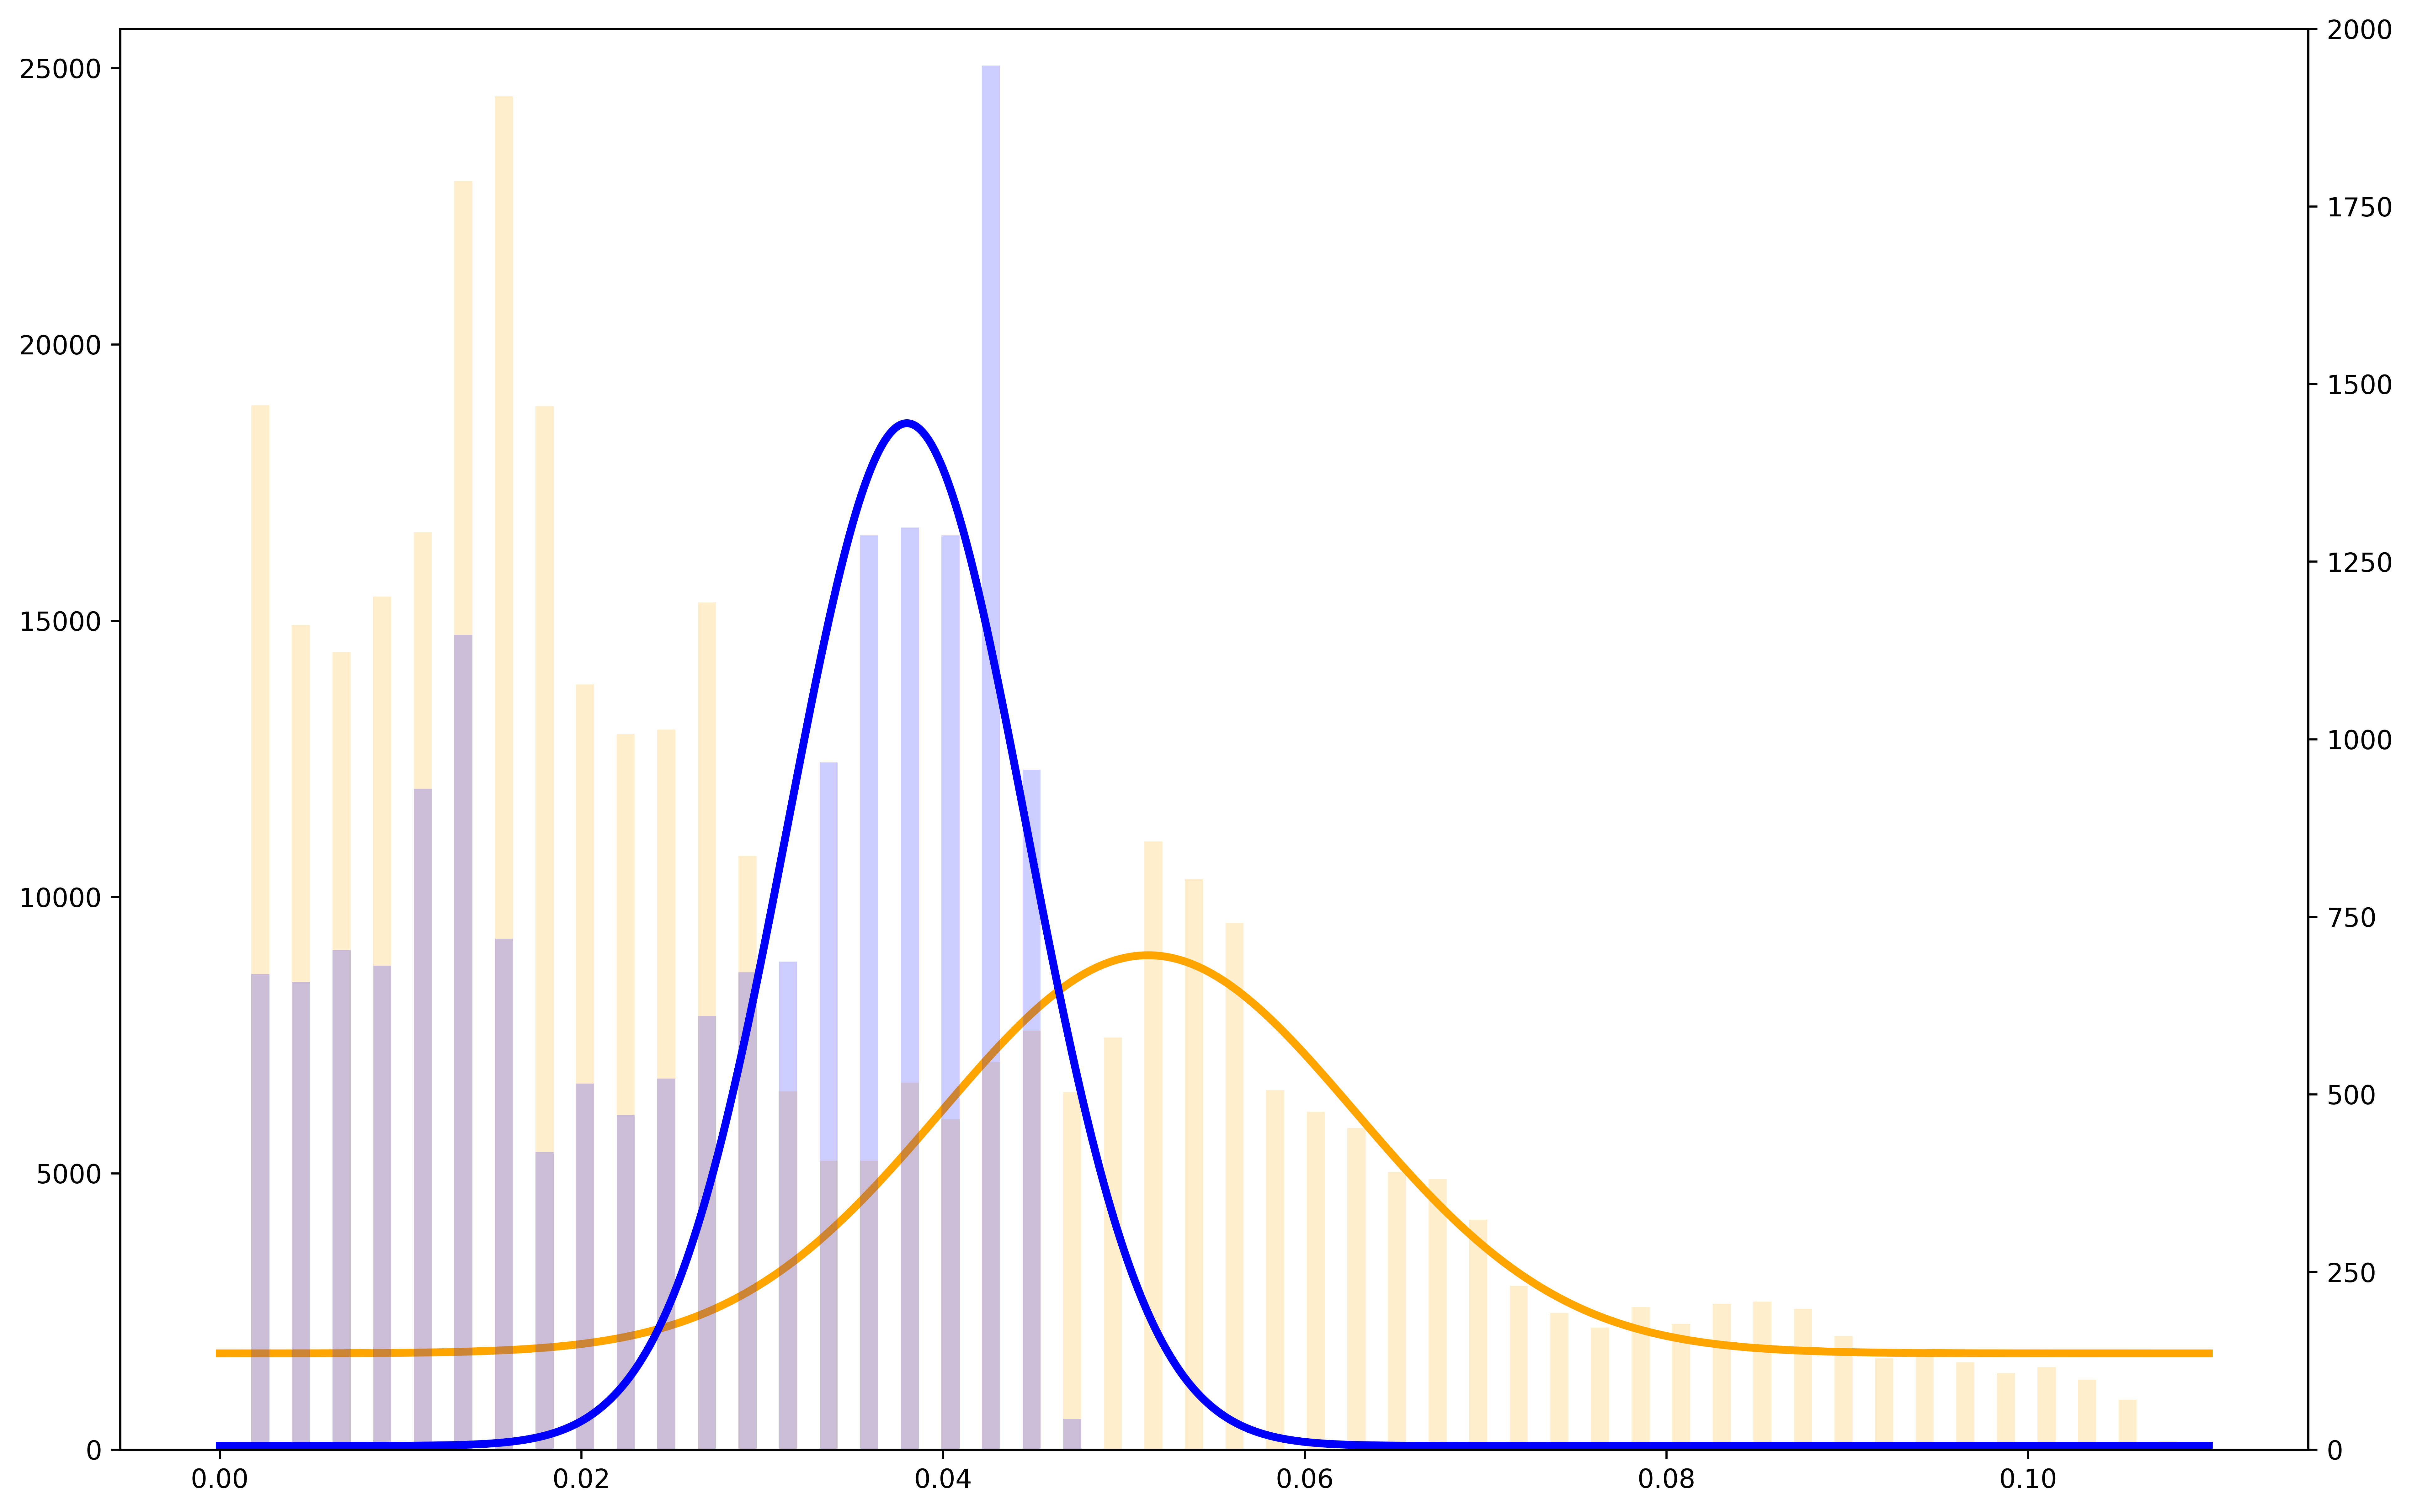

In [631]:
ind = np.arange(1994,2017)
width = 0.8
fig = plt.figure(figsize=(15,10),dpi=600)
fig.tight_layout()   

ax = fig.add_subplot(111)

atch = np.load("atch_all.npz")
barall = ax.bar( atch["bins"][1:-1], atch["hist"][1:], width=0.001, alpha=0.2, color="orange" )

popt, pcov = curve_fit(func, atch["bins"][16:35], atch["hist"][16:35])
xdata = np.linspace(atch["bins"][0], atch["bins"][-1], 1000 )
plotall = ax.plot( xdata, func( xdata, *popt), color="orange", linewidth=3 )

# plt.plot(  atch["bins"][16:35], atch["hist"][16:35] )




atch = np.load("atch_2016.npz")
ax2 = ax.twinx() 
bar16 = ax2.bar( atch["bins"][1:-1], atch["hist"][1:], width=0.001, alpha=0.2, color="blue" )

popt, pcov = curve_fit(func, atch["bins"][10:-1], atch["hist"][10:])
xdata = np.linspace(atch["bins"][0], atch["bins"][-1], 1000 )
plot16 = ax2.plot( xdata, func( xdata, *popt), color="blue", linewidth=3 )
ax2.set_ylim( (0,2000) )


# ax.set_title( "Atchafalaya River Influence", fontsize=36 )
# fig.legend( ([barall, bar16]), (["Total", "2016"]), loc=(0.2,0.6), fontsize=24, borderpad=1 )

# Brazos

In [503]:
# bins = np.linspace(0,0.03,50)
# hist = np.zeros(len(bins)-1)

# index = 23
# hist += np.histogram( d["dye_04"][ start_time[index] : end_time[index], 29, 27:35, 301:310], bins)[0]
# # plt.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], d["dye_03"][ 100000, 29,:,:])





In [505]:
# np.savez( "unscaled_braz_2016", hist=hist, bins=bins )

(0, 6100)

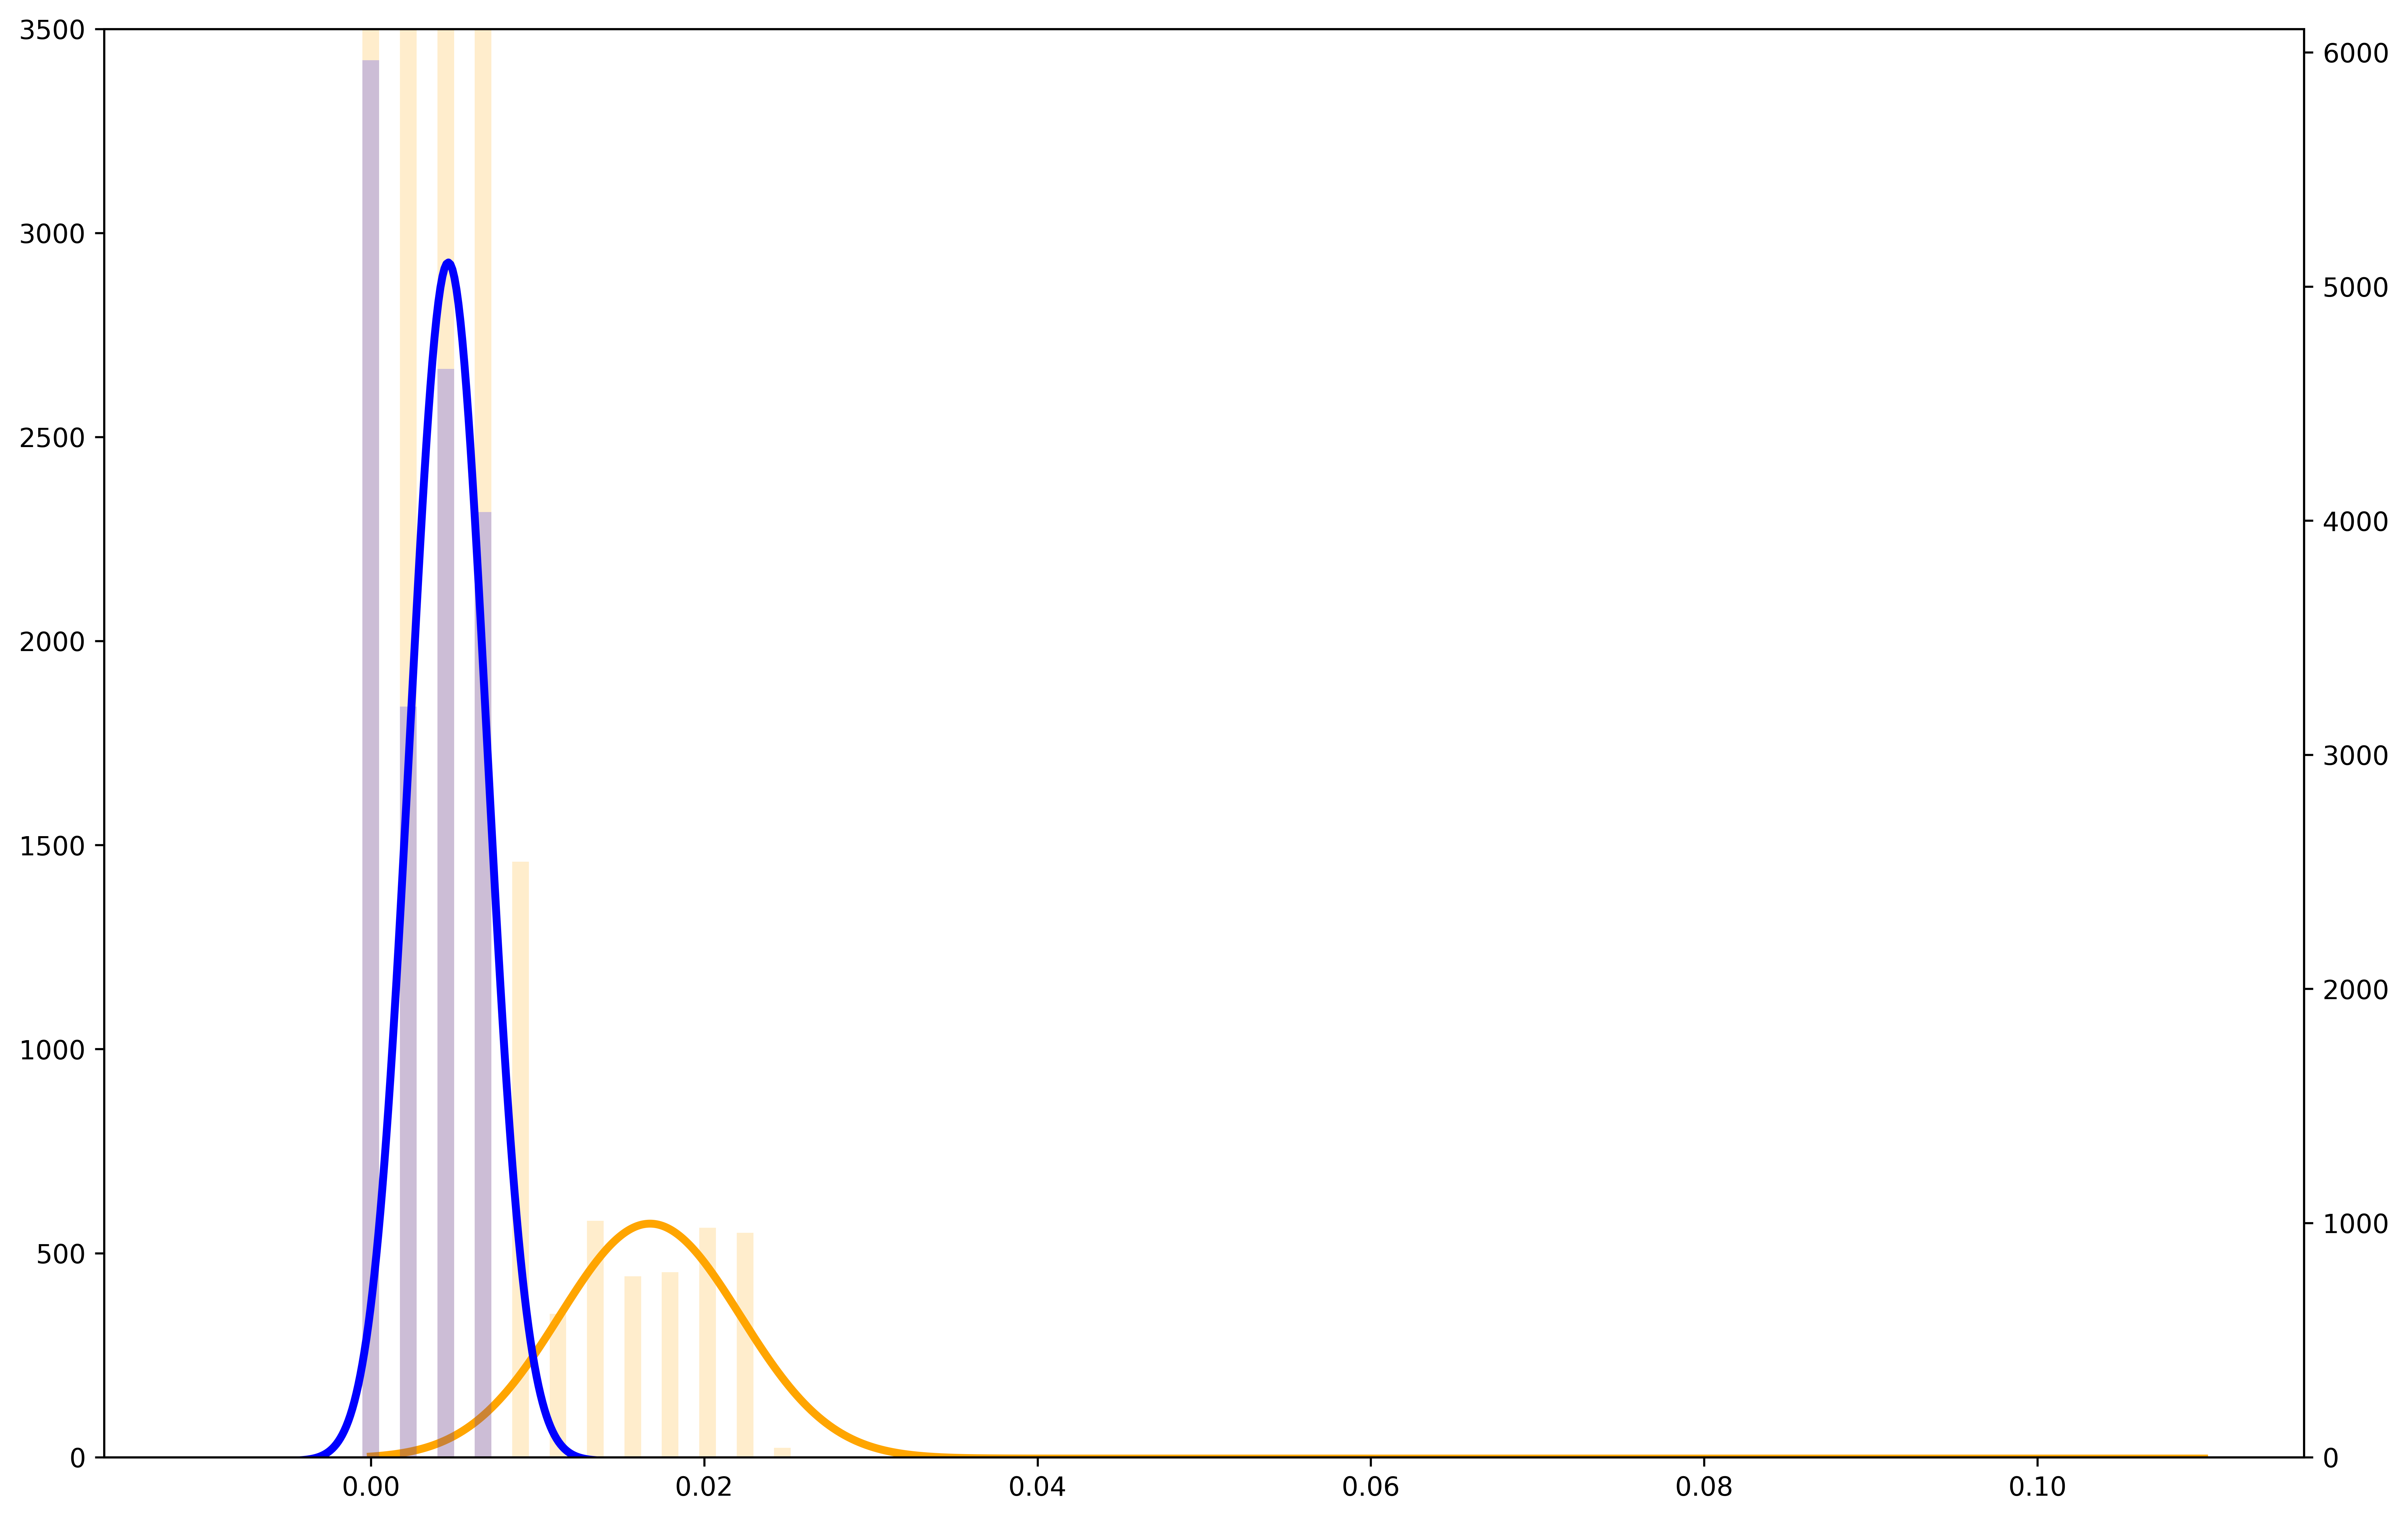

In [700]:
ind = np.arange(1994,2017)
width = 0.8
fig = plt.figure(figsize=(15,10),dpi=600)
fig.tight_layout()   

ax = fig.add_subplot(111)

braz = np.load("braz_all.npz")
barall = ax.bar( braz["bins"][:-1], braz["hist"][:], width=0.001, alpha=0.2, color="orange" )

popt, pcov = curve_fit(func, braz["bins"][5:49], braz["hist"][5:49])
xdata = np.linspace(braz["bins"][0], braz["bins"][-1], 1000 )
plotall = ax.plot( xdata, func( xdata, *popt), color="orange", linewidth=3 )

# plt.plot(  braz["bins"][5:11], braz["hist"][5:11] )
# plt.plot(  atch["bins"][5:11], atch["hist"][5:11] )


braz = np.load("braz_2016.npz")
ax2 = ax.twinx() 
bar16 = ax2.bar( braz["bins"][:-1], braz["hist"][:], width=0.001, alpha=0.2, color="blue" )

popt, pcov = curve_fit(func, braz["bins"][1:34], braz["hist"][1:34])
xdata = np.linspace(braz["bins"][0]-0.01, braz["bins"][-1], 1000 )
plot16 = ax2.plot( xdata, func( xdata, *popt), color="blue", linewidth=3 )
ax.set_ylim( (0,3500) )
ax2.set_ylim( (0,6100) )
